In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data.csv')

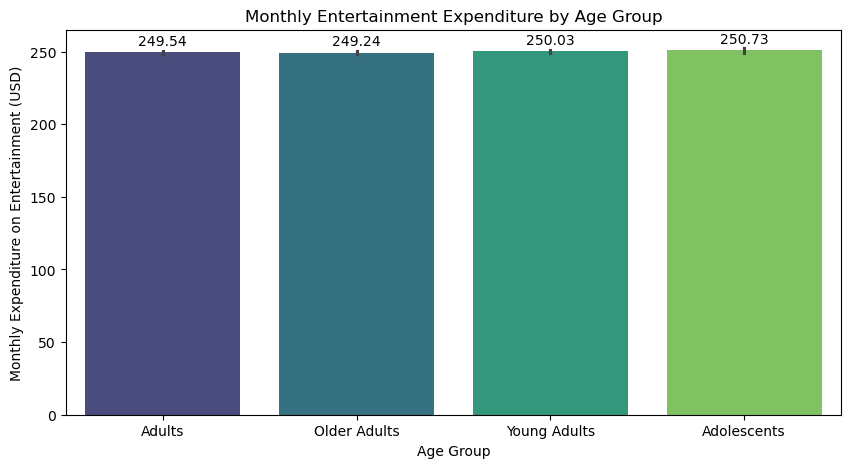

In [3]:
#Monthly Expenditure on Entertainment by Age Group

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Age Group', y='Monthly Expenditure on Entertainment (USD)', data=df, hue='Age Group', palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.title('Monthly Entertainment Expenditure by Age Group')
plt.show()

In [4]:
#Mean Social Media Time per Age Group

age_group_stats = df.groupby('Age Group')['Daily Social Media Time (hrs)'].mean()
print(age_group_stats)


Age Group
Adolescents     4.291364
Adults          4.248146
Older Adults    4.250951
Young Adults    4.253027
Name: Daily Social Media Time (hrs), dtype: float64


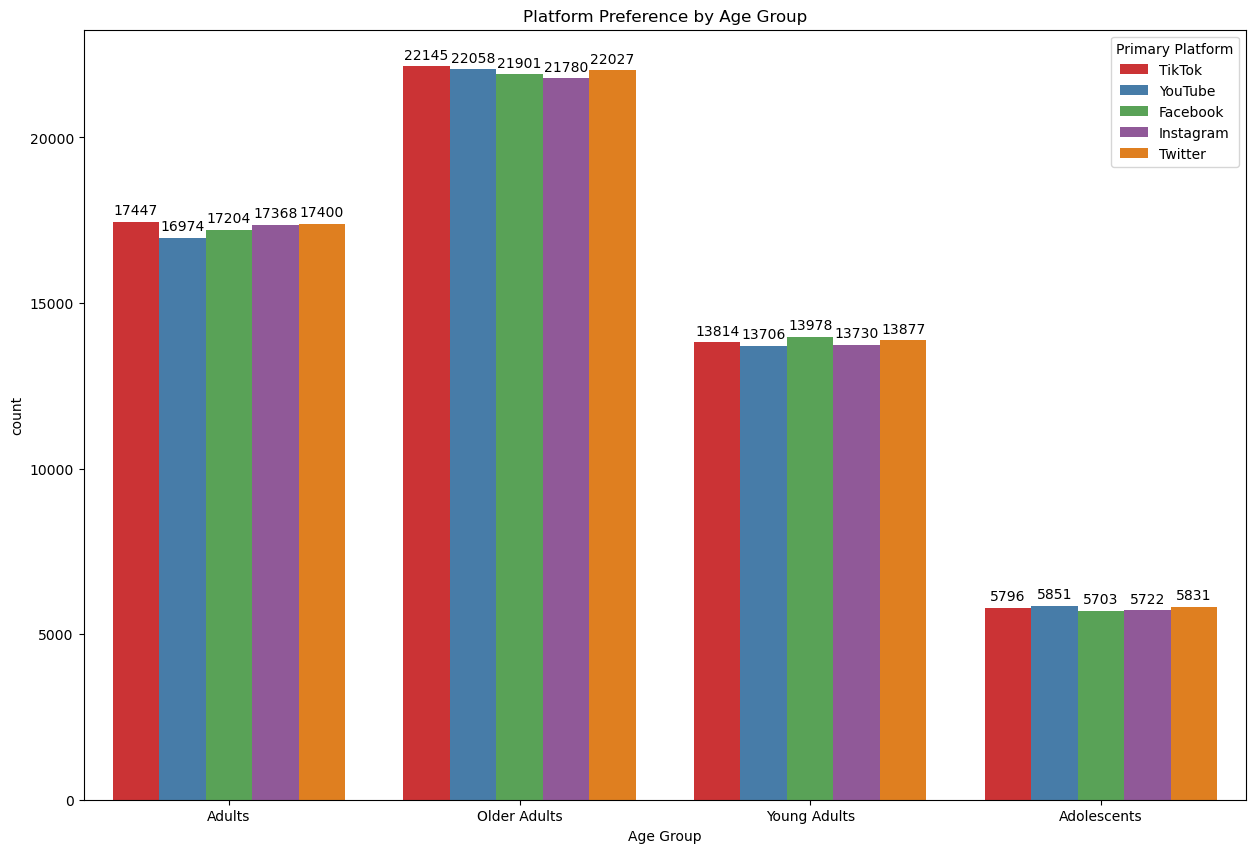

In [5]:
#Platform Preference by Age Group

plt.figure(figsize=(15, 10))
ax = sns.countplot(x='Age Group', hue='Primary Platform', data=df, palette='Set1')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.title('Platform Preference by Age Group')
plt.show()


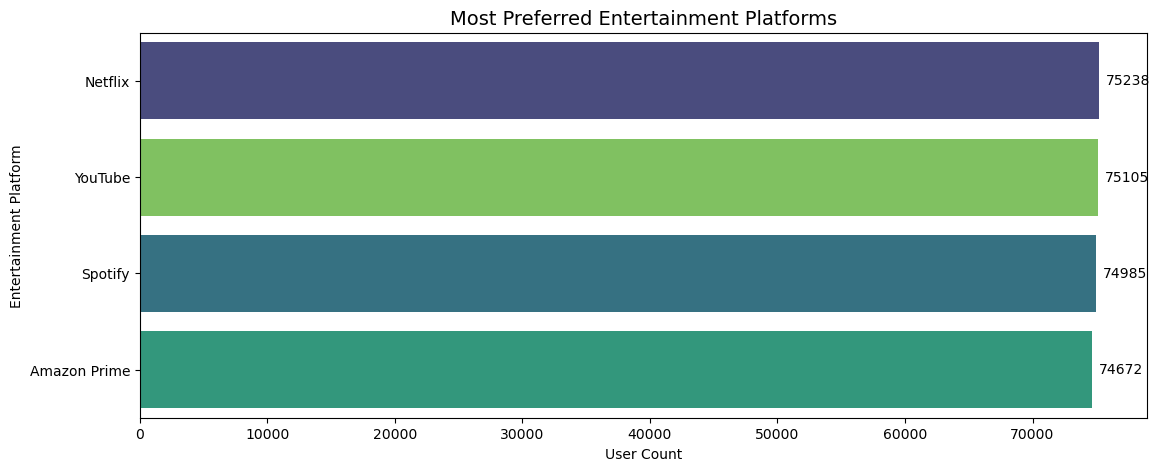

In [6]:
#Popularity of Entertainment Platforms

plt.figure(figsize=(13, 5))
ax = sns.countplot(
    data=df, 
    y="Preferred Entertainment Platform", 
    hue="Preferred Entertainment Platform", 
    order=df["Preferred Entertainment Platform"].value_counts().index, 
    palette="viridis", 
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5)
    
plt.title("Most Preferred Entertainment Platforms", fontsize=14)
plt.xlabel("User Count")
plt.ylabel("Entertainment Platform")
plt.show()

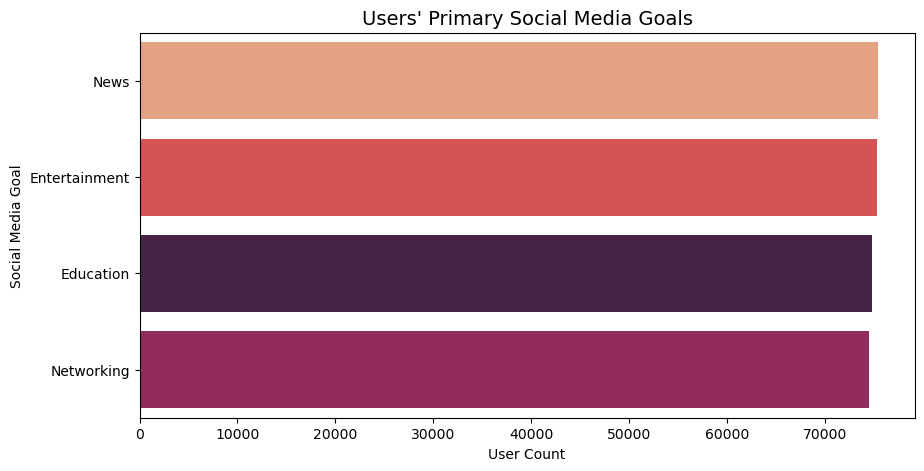

In [7]:
#Social Media Goals Analysis

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="Primary Social Media Goal",hue="Primary Social Media Goal", order=df["Primary Social Media Goal"].value_counts().index, palette="rocket")
plt.title("Users' Primary Social Media Goals", fontsize=14)
plt.xlabel("User Count")
plt.ylabel("Social Media Goal")
plt.show()


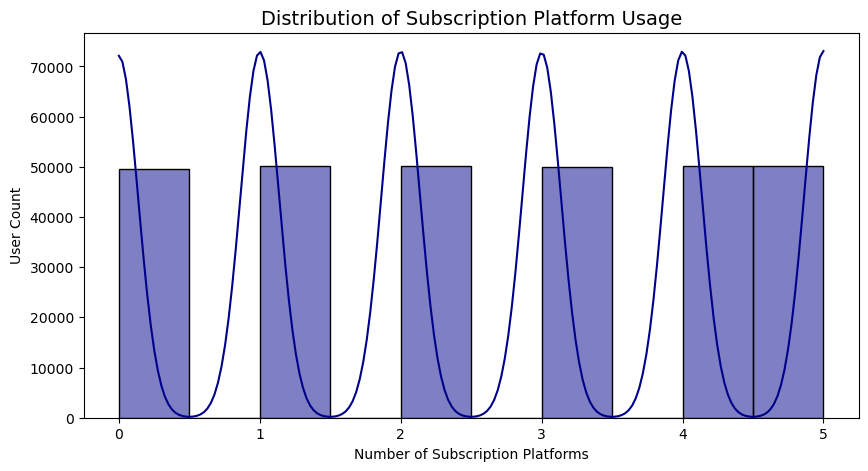

In [8]:
#Subscription Platforms Usage
#Purpose: Do users subscribe to multiple platforms, or stick to one?

plt.figure(figsize=(10, 5))
sns.histplot(df["Subscription Platforms"], bins=10, kde=True, color="darkblue")
plt.title("Distribution of Subscription Platform Usage", fontsize=14)
plt.xlabel("Number of Subscription Platforms")
plt.ylabel("User Count")
plt.show()

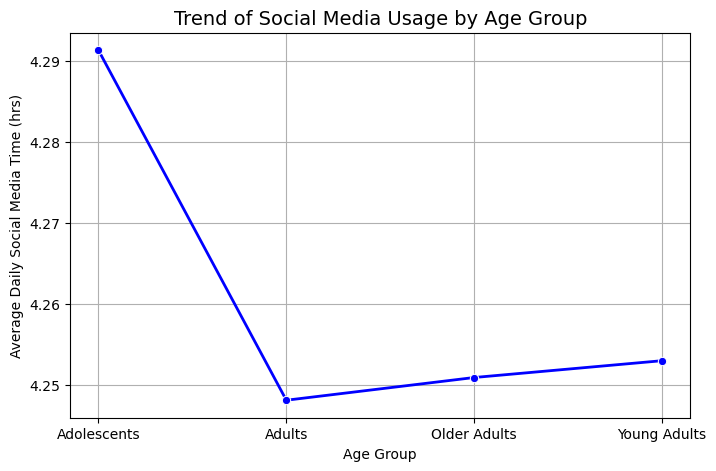

In [9]:
#Average Social Media Time by Age Group

age_trend = df.groupby('Age Group')['Daily Social Media Time (hrs)'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=age_trend.index, y=age_trend.values, marker='o', color='b', linewidth=2)
plt.title("Trend of Social Media Usage by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Average Daily Social Media Time (hrs)")
plt.grid(True)
plt.show()


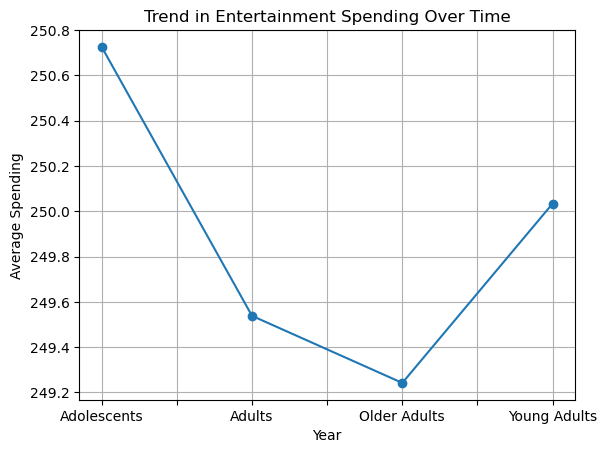

In [10]:
df.groupby('Age Group')['Monthly Expenditure on Entertainment (USD)'].mean().plot(kind='line', marker='o')
plt.title("Trend in Entertainment Spending Over Time")
plt.xlabel("Year")
plt.ylabel("Average Spending")
plt.grid(True)
plt.show()

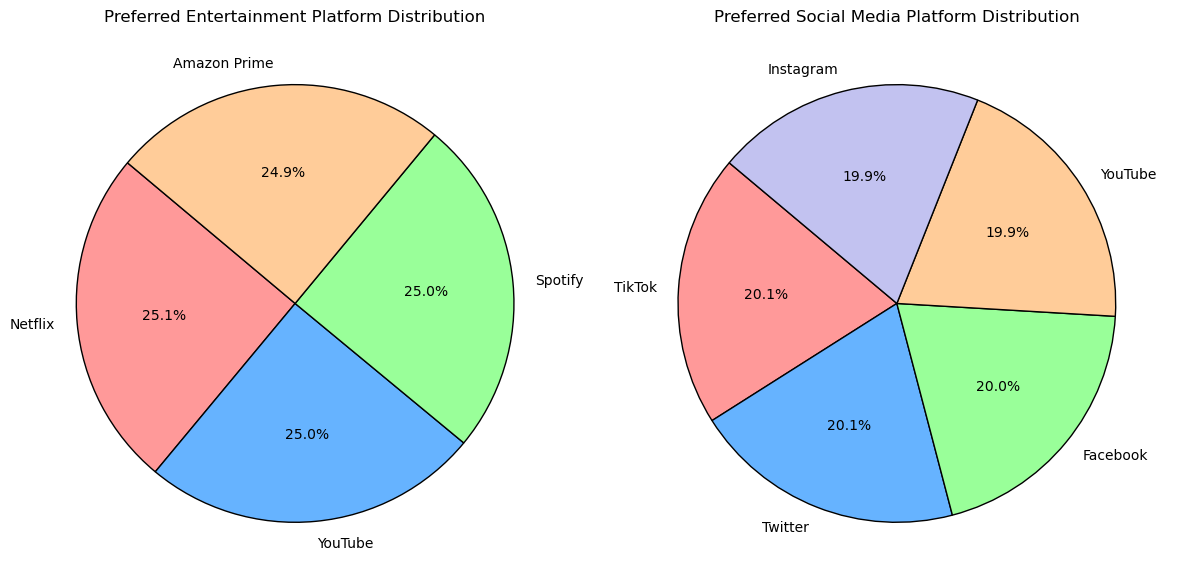

In [11]:
#Preferred Entertainment Platform Distribution vs Preferred Social Media Platform Distribution

platform_counts = df["Preferred Entertainment Platform"].value_counts()
counts = df["Primary Platform"].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[0].set_title("Preferred Entertainment Platform Distribution")

axes[1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Preferred Social Media Platform Distribution")

plt.tight_layout()
plt.show()
